In [2]:
import os
import pygame as pg

pygame 2.1.3.dev8 (SDL 2.0.22, Python 3.11.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [12]:
# program to draw a picture using the mouse and save it as a png file
# initialize pygame
pg.init()
# set the screen size
screen = pg.display.set_mode((500, 500))
# set the screen title
pg.display.set_caption("EigenPaint")
# set the screen background color
screen.fill((255, 255, 255))
# set the variable to keep the program running
running = True
# add UI button to save the screen on new surface
save_button = pg.Rect(0, 0, 100, 50)
pg.draw.rect(screen, (0, 0, 0), save_button)
# Add text to the save button
font = pg.font.SysFont("Arial", 20)
text = font.render("Save", True, (255, 255, 255))
screen.blit(text, (save_button.x + 30, save_button.y + 10))
# set the screen to be visible
pg.display.flip()
# set the variable to check if the mouse is drawing
drawing = False
# main loop
while running:
    # loop through the event queue
    for event in pg.event.get():
        # check for closing the window
        if event.type == pg.QUIT:
            running = False
            pg.quit()
        # check for mouse button down
        if event.type == pg.MOUSEBUTTONDOWN:
            # check for left mouse button
            if event.button == 1:
                # get the mouse position
                pos = pg.mouse.get_pos()
                # if the mouse is in the save button
                if save_button.collidepoint(pos):
                    # save the screen as a png in same folder as the program
                    pg.image.save(screen, os.path.join(
                        os.path.abspath(''), "paint.png"))
                else:
                    drawing = True
                    # draw a circle at the mouse position
                    pg.draw.circle(screen, (0, 0, 0), pos, 5)
                    # update the screen
                    pg.display.flip()
        # check for mouse button up
        elif event.type == pg.MOUSEBUTTONUP:
            drawing = False
        # check for mouse motion
        elif event.type == pg.MOUSEMOTION:
            # check for left mouse button
            if pg.mouse.get_pressed()[0] and drawing:
                # get the mouse position
                pos = pg.mouse.get_pos()
                # draw a circle at the mouse position
                pg.draw.circle(screen, (0, 0, 0), pos, 5)
                # update the screen
                pg.display.flip()


In [65]:
# webscrape 20 images each of 10 characters
# save images to folder
import os
from bing_image_downloader import downloader
import shutil

# create folder to save images if it doesn't exist
if not os.path.exists('images'):
    os.mkdir('images')
    
# create list of characters
characters = ['apple','brinjal']


In [66]:
# %%script false --no-raise-error
# delete all folders which are not in characters
import cv2
for folder in os.listdir('images'):
    if folder not in characters:
        shutil.rmtree('images/' + folder)
# loop through each character
for character in characters:
    # download 20 images of each character
    downloader.download(character+" vector art", limit=10, output_dir='images/',
                        adult_filter_off=True, force_replace=False, timeout=60, verbose=False, filter="photo")


[%] Downloading Images to d:\DSLab\ML\EigenPaint\images\apple vector art
[Error]Invalid image, not saving https://static.vecteezy.com/system/resources/previews/000/374/419/original/vector-illustration-of-a-juicy-apple.jpg

[!] Issue getting: https://static.vecteezy.com/system/resources/previews/000/374/419/original/vector-illustration-of-a-juicy-apple.jpg
[!] Error:: Invalid image, not saving https://static.vecteezy.com/system/resources/previews/000/374/419/original/vector-illustration-of-a-juicy-apple.jpg



[%] Done. Downloaded 10 images.
[%] Downloading Images to d:\DSLab\ML\EigenPaint\images\brinjal vector art
[Error]Invalid image, not saving http://img.clipartlook.com/eggplant-clipart-brinjal-vector-art-illustration-442.jpg

[!] Issue getting: http://img.clipartlook.com/eggplant-clipart-brinjal-vector-art-illustration-442.jpg
[!] Error:: Invalid image, not saving http://img.clipartlook.com/eggplant-clipart-brinjal-vector-art-illustration-442.jpg



[%] Done. Downloaded 10 images.


In [68]:
# create face only images
import cv2
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

# delete and recreate images_512_face folder
if os.path.exists('images_512_face'):
    shutil.rmtree('images_512_face')
os.mkdir('images_512_face')

for folder in os.listdir('images_512_face'):
    if folder not in characters:
        shutil.rmtree('images_512_face/' + folder)

# loop through each character
for character in characters:
    # create folder to save images if it doesn't exist
    if not os.path.exists('images_512_face/' + character):
        os.mkdir('images_512_face/' + character)
    # loop through each image
    for image in os.listdir('images/' + character+" vector art"):
        try:
            # read image
            imgOG = cv2.imread('images/' + character+" vector art" + '/' + image)
            # # read img but as grayscale
            # img = cv2.imread('images/' + character+" face" + '/' + image, 0)
            # # # Convert into grayscale
            # # img = cv2.cvtColor(imgOG, cv2.COLOR_BGR2GRAY)
            # # detect faces
            # result = face_cascade.detectMultiScale3(
            #     img, 1.1, 4, outputRejectLevels=True)
            # face = result[0]
            # levelWeight = result[2]
            # # skip example if confidence not high enough
            # if len(face) == 0 or max(levelWeight) < 0.5:
            #     raise Exception("No face detected")
            # # crop face
            # for (x, y, w, h) in face:
            #     imgOG = imgOG[y:y+h, x:x+w]
            # resize image
            imgOG = cv2.resize(imgOG, (256, 256))
            # save image
            cv2.imwrite('images_512_face/' + character + '/' + image, imgOG)
        except Exception as e:
            print(e)
            pass


In [69]:
# create dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

df = pd.DataFrame()
y = pd.DataFrame(columns=['character'])


def clamp(n, minn, maxn): return max(min(maxn, n), minn)


# loop through every image
for character in characters:
    for image in os.listdir('images_512_face/' + character):
        # read image as grayscale
        img = cv2.imread('images_512_face/' + character + '/' + image, 0)
        # flatten image
        imgFlat = img.flatten()
        # add image to dataset
        df = pd.concat([df, pd.DataFrame(imgFlat).T], ignore_index=True)
        # add label to y
        y = pd.concat(
            [y, pd.DataFrame([character], columns=['character'])], ignore_index=True)
df


,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,254,167,165,166,166,166,167,168,166,167,...,205,205,204,205,206,205,204,204,205,253
4,255,255,255,255,255,255,255,254,2,2,...,18,34,254,255,255,255,255,255,255,255
5,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
6,164,164,164,164,164,164,164,164,164,164,...,203,203,203,203,203,203,203,202,202,202
7,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
8,255,255,255,255,255,254,254,254,247,248,...,205,205,254,255,255,255,255,255,255,255
9,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


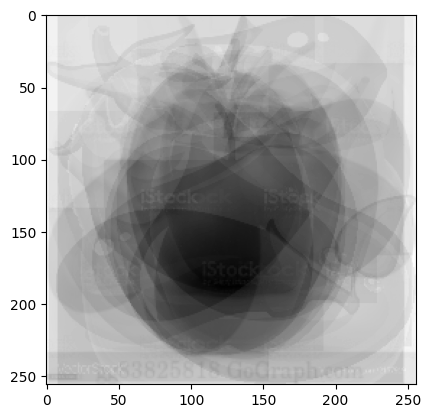

In [125]:
#make mean face
from sklearn.decomposition import PCA
mean = df.mean(axis=0)
# show mean face by unflattening
plt.imshow(mean.values.reshape(256, 256), cmap='gray')
# function to do PCA with given number of components
def doPCA(n, X_train):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    return pca

,0,1,2,3,4
0,-15340.721277,6398.656616,2899.540494,7506.859328,3030.054776


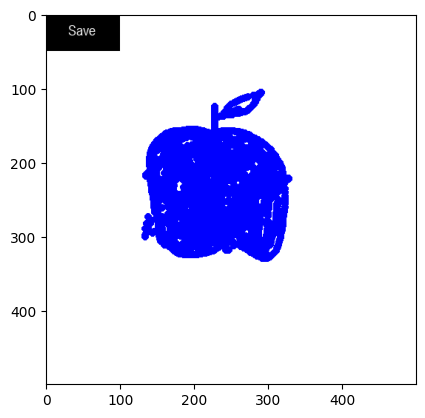

In [137]:
# reconstruct df with 5 components
pca = doPCA(5, df)
# do 1NN classification with paint.png
test=cv2.imread('paint.png')
plt.imshow(test)
test=cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)
test=cv2.resize(test,(256,256))
test=test.flatten()
test=pd.DataFrame(test).T
test=pca.transform(test)
test=pd.DataFrame(test)
test

In [138]:
# plot all reconstructed faces
for i in range(df.index.size):
    # transform image
    img = pca.transform(df.iloc[i].values.reshape(1, -1))
    # inverse transform image
    img = pca.inverse_transform(img)
    # unflatten image
    img = img.reshape(256, 256)

In [139]:
# find nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(pca.transform(df), y)
knn.predict(test)

c:\Users\abish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array(['apple'], dtype=object)

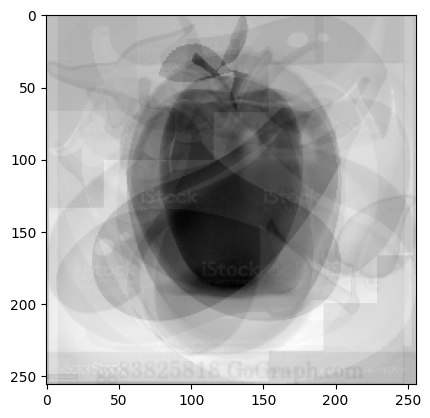

In [136]:
#plot reconstructed face
img = pca.inverse_transform(test)
img = img.reshape(256, 256)
plt.imshow(img, cmap='gray')